<a href="https://colab.research.google.com/github/anuraagbhavaraju/computer-vision-chest-xray/blob/data-preprocessing/CXR_Classification_Comparitive_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data from Kaggle

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-montgomery

 97% 566M/585M [00:06<00:00, 115MB/s]
100% 585M/585M [00:06<00:00, 98.3MB/s]


In [ ]:
!unzip /content/tuberculosis-chest-xrays-montgomery.zip

In [ ]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen

100% 3.51G/3.51G [00:46<00:00, 91.7MB/s]
100% 3.51G/3.51G [00:46<00:00, 81.2MB/s]


In [ ]:
!unzip /content/tuberculosis-chest-xrays-shenzhen.zip

In [ ]:
!kaggle datasets download -d hmchuong/xray-bone-shadow-supression

100% 5.21G/5.23G [00:59<00:00, 141MB/s]
100% 5.23G/5.23G [00:59<00:00, 93.7MB/s]


In [ ]:
!unzip /content/xray-bone-shadow-supression.zip

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:13<00:00, 243MB/s]
100% 2.29G/2.29G [00:13<00:00, 188MB/s]


In [ ]:
!unzip /content/chest-xray-pneumonia

# Meta Data Pre-Processing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

montgomery_df = pd.read_csv('/content/montgomery_metadata.csv')
montgomery_df['datasource']='montgomery_df'
shenzhen_df = pd.read_csv('/content/shenzhen_metadata.csv')
shenzhen_df['datasource']='shenzhen_df'
jsrt_df = pd.read_csv('/content/jsrt_metadata.csv')
jsrt_df['datasource']='jsrt_df'
shenzhen_df=shenzhen_df.rename(columns={'sex':'gender'})
all_xray_df = montgomery_df.append(shenzhen_df)
all_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('..', 'content', 'images*', '*', '*.png'))}
jsrt_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('..', 'content', 'JSRT*', '*', '*.png'))}
bse_jsrt_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('..', 'content', 'BSE_JSRT*', '*', '*.png'))}
all_xray_df['path']=all_xray_df['study_id'].apply(lambda x:all_image_paths.get(x))
jsrt_df['path']=jsrt_df['study_id'].apply(lambda x:jsrt_image_paths.get(x))
jsrt_df['bse_path']=jsrt_df['study_id'].apply(lambda x:bse_jsrt_image_paths.get(x))
all_xray_df=all_xray_df[all_xray_df['path'].notna()]
jsrt_df=jsrt_df[(jsrt_df['path'].notna()) & (jsrt_df['bse_path'].notna())]
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df.sample(3)

Scans found: 800 , Total Headers 800


<ipython-input-1-39fd4125cd4c>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_xray_df = montgomery_df.append(shenzhen_df)


,study_id,age,gender,findings,datasource,path
382,CHNCXR_0383_1.png,58,Male,bilateral PTB,shenzhen_df,../content/images/images/CHNCXR_0383_1.png
513,CHNCXR_0514_1.png,28,Female,bilateral PTB,shenzhen_df,../content/images/images/CHNCXR_0514_1.png
427,CHNCXR_0428_1.png,39,Female,secondary PTB in the right upper field,shenzhen_df,../content/images/images/CHNCXR_0428_1.png


In [ ]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('/content/chest_xray')
# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'
# Path to validation directory
val_dir = data_dir / 'val'
# Path to test directory
test_dir = data_dir / 'test'
########################################################################################
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []
# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))
# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
# Shuffle the data
train_data = train_data.sample(frac=1.).reset_index(drop=True)
########################################################################################
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = val_dir / 'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
# An empty list. We will insert the data into this list in (img_path, label) format
valid_data = []
# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    valid_data.append((img,0))
# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    valid_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list
valid_data = pd.DataFrame(valid_data, columns=['image', 'label'],index=None)
# Shuffle the data
valid_data = valid_data.sample(frac=1.).reset_index(drop=True)
########################################################################################
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []
# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    test_data.append((img,0))
# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    test_data.append((img, 1))
# Get a pandas dataframe from the data we have in our list
test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)
# Shuffle the data
test_data = test_data.sample(frac=1.).reset_index(drop=True)
train_data=train_data.append(valid_data)
train_data=train_data.append(test_data)

<ipython-input-2-4a42f3a67487>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data=train_data.append(valid_data)
<ipython-input-2-4a42f3a67487>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data=train_data.append(test_data)


In [ ]:
train_data=train_data.rename(columns={'image':'path','label':'findings'})
train_data['findings']=np.where(train_data['findings']==1,'abnormal','normal')
train_data['path']=train_data['path'].astype(str)
train_data['datasource']='train_data'

In [ ]:
# # For training CLAHE Transformed images
# all_xray_df['path']=all_xray_df['path'].apply(lambda x:x.replace('/content/images/images/','content/images/transformed_images/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/train/PNEUMONIA/','/content/chest_xray/CLAHE_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/train/NORMAL/','/content/chest_xray/CLAHE_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/test/PNEUMONIA/','/content/chest_xray/CLAHE_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/test/NORMAL/','/content/chest_xray/CLAHE_Transformed/'))
# train_data=train_data[train_data['path'].notna()]

In [ ]:
# # For training CLAHE Transformed images
# all_xray_df['path']=all_xray_df['path'].apply(lambda x:x.replace('/content/images/images/','content/images/transformed_images_blackhat/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/train/PNEUMONIA/','/content/chest_xray/BLACKHAT_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/train/NORMAL/','/content/chest_xray/BLACKHAT_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/test/PNEUMONIA/','/content/chest_xray/BLACKHAT_Transformed/'))
# train_data['path']=train_data['path'].apply(lambda x:x.replace('/content/chest_xray/test/NORMAL/','/content/chest_xray/BLACKHAT_Transformed/'))
# train_data=train_data[train_data['path'].notna()]

In [ ]:
all_xray_df=all_xray_df.append(train_data)

<ipython-input-6-0742edc2fb46>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_xray_df=all_xray_df.append(train_data)


# Data Pre-Processing

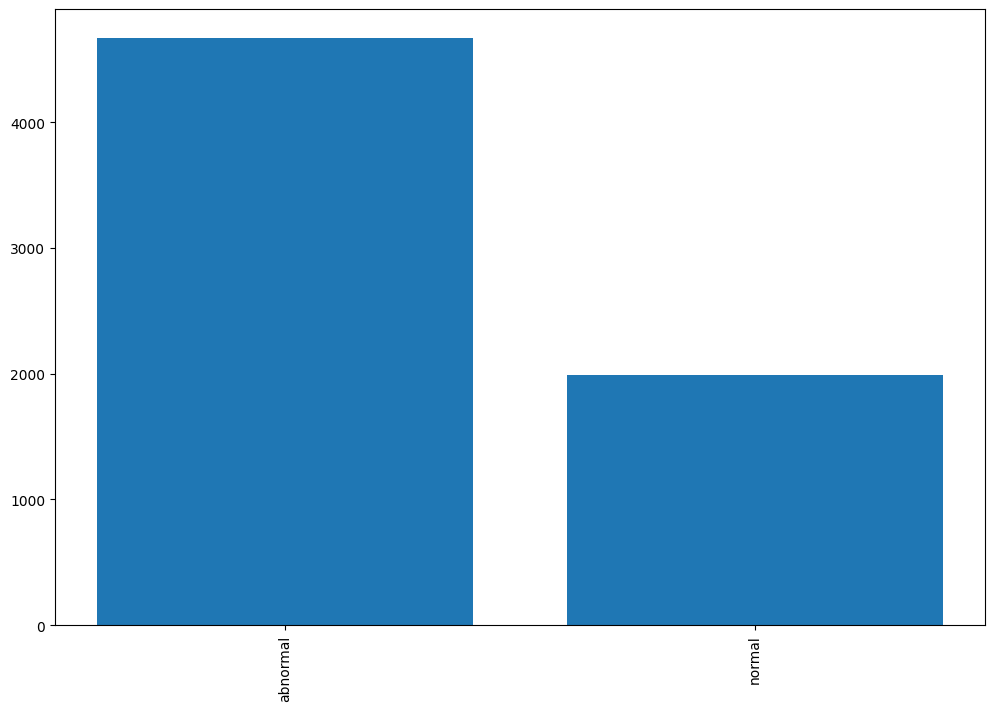

In [ ]:
all_xray_df['findings']=np.where(all_xray_df['findings']!='normal','abnormal','normal')
jsrt_df=jsrt_df[['study_id','age','gender','diagnosis','path','bse_path']]
jsrt_df=jsrt_df.rename(columns={'diagnosis':'findings'})
jsrt_df['findings']=jsrt_df['findings'].fillna('normal')
jsrt_df['findings']=np.where(jsrt_df['findings']!='normal','abnormal','normal')
label_counts = all_xray_df['findings'].value_counts()
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
all_labels = np.unique(list(all_xray_df['findings']))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
all_xray_df.sample(3)

All Labels (2): ['abnormal', 'normal']


,study_id,age,gender,findings,datasource,path
3960,NaN,NaN,NaN,abnormal,train_data,/content/chest_xray/train/PNEUMONIA/person67_b...
4639,NaN,NaN,NaN,abnormal,train_data,/content/chest_xray/train/PNEUMONIA/person1355...
4599,NaN,NaN,NaN,abnormal,train_data,/content/chest_xray/train/PNEUMONIA/person413_...
